In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("salart_data_cleaned.csv")

In [47]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$75K - $142K (Glassdoor est.),Overview:\nData Scientist\nResponsibilities:\n...,4.7,Delaware Nation Industries,"Washington, DC",-1,201 to 500 Employees,-1,Contract,...,142,108.5,DC,0,-1,0,0,0,0,0
1,Senior Data Scientist - Telematics,$92K - $165K (Glassdoor est.),"Ready to make an impact? If so, read on!\nGEIC...",3.4,GEICO,"Chevy Chase, MD",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,165,128.5,MD,0,85,0,0,0,0,0
2,Data Scientist,$80K - $145K (Glassdoor est.),"Working out of our Chevy Chase, MD/Washington ...",3.4,GEICO,"Chevy Chase, MD",-1,10000+ Employees,1936,Subsidiary or Business Segment,...,145,112.5,MD,0,85,1,0,1,0,0
3,Data Scientist IV,$104K - $193K (Glassdoor est.),What We're Looking For:\nThe Data Scientist IV...,3.9,2U,"Brooklyn, NY",-1,1001 to 5000 Employees,2008,Company - Public,...,193,148.5,NY,0,13,0,0,0,0,0
4,Data Analyst,$37K - $81K (Glassdoor est.),***We do not offer visa sponsorship for this r...,3.4,Alaska Heart and Vascular Institute,"Anchorage, AK",-1,51 to 200 Employees,-1,Company - Private,...,81,59.0,AK,0,-1,0,0,0,0,1


In [48]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel'],
      dtype='object')

In [49]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [50]:
df['job_simp'] = df['Job Title'].apply(lambda x: title_simplifier(str(x)))

In [51]:
df.job_simp.value_counts()

na                314
analyst           228
data scientist    205
data engineer      99
mle                86
manager            58
director            9
Name: job_simp, dtype: int64

In [52]:
df['seniority'] = df['Job Title'].apply(lambda x: seniority(str(x)))
df.seniority.value_counts()

na        704
senior    295
Name: seniority, dtype: int64

In [53]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: str(x).strip() if str(x).strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA          189
MA           80
MD           76
VA           67
WA           57
NJ           57
TX           53
nan          41
PA           34
IL           32
MI           27
CO           25
CT           25
WI           24
NM           21
NY           21
IN           21
SC           19
OH           18
FL           11
MN           11
NC           10
AZ            9
UT            8
GA            5
NE            4
KS            4
MO            4
DE            4
KY            4
DC            4
OR            4
LA            4
ME            3
IA            3
OK            3
TN            3
ID            3
HI            2
RI            2
WV            2
NV            2
AK            1
NH            1
Arapahoe      1
Name: job_state, dtype: int64

In [54]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       439
1      1295
2      1308
3       878
4      1017
       ... 
994       2
995       2
996       2
997       2
998       2
Name: desc_len, Length: 999, dtype: int64

In [55]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(str(x).split(',')) if x != '-1' else 0)
df['num_comp']

0      1
1      1
2      1
3      1
4      1
      ..
994    1
995    1
996    1
997    1
998    1
Name: num_comp, Length: 999, dtype: int64

In [56]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [57]:
df[df.hourly ==0][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
0,0,75,142
1,0,92,165
2,0,80,145
3,0,104,193
4,0,37,81
...,...,...,...
994,0,57,101
995,0,57,101
996,0,57,101
997,0,57,101


In [59]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,999.000000,999.0,999.000000,999.0,999.0,999.0,999.000000,999.000000,999.000000,999.0,999.000000,999.000000,999.0,999.000000,999.000000,999.000000,999.000000,999.0
mean,0.756957,-1.0,587.740741,-1.0,0.0,0.0,69.372372,125.877878,97.625125,0.0,15.741742,0.016016,0.0,0.007007,0.009009,0.051051,490.329329,1.0
std,2.324391,0.0,901.650886,0.0,0.0,0.0,17.646253,32.648076,24.977592,0.0,36.650729,0.125600,0.0,0.083456,0.094535,0.220212,648.048798,0.0
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,37.000000,81.000000,59.000000,0.0,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,1.0
25%,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,57.000000,101.000000,79.000000,0.0,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,1.0
50%,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,57.000000,101.000000,79.000000,0.0,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,1.0
75%,3.600000,-1.0,1915.500000,-1.0,0.0,0.0,84.000000,145.000000,112.000000,0.0,14.000000,0.000000,0.0,0.000000,0.000000,0.000000,883.500000,1.0
max,5.000000,-1.0,2021.000000,-1.0,0.0,0.0,112.000000,211.000000,161.500000,0.0,215.000000,1.000000,0.0,1.000000,1.000000,1.000000,8366.000000,1.0


<AxesSubplot:>

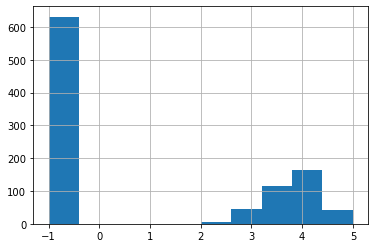

In [60]:
df.Rating.hist()

<AxesSubplot:>

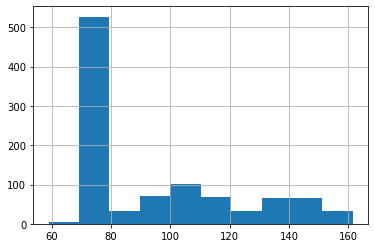

In [61]:
df.avg_salary.hist()

<AxesSubplot:>

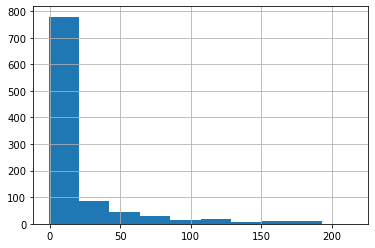

In [62]:
df.age.hist()

<AxesSubplot:>

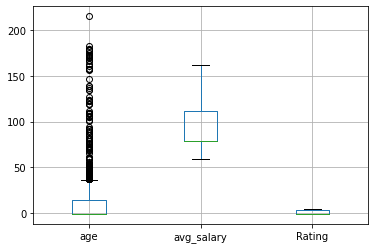

In [63]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

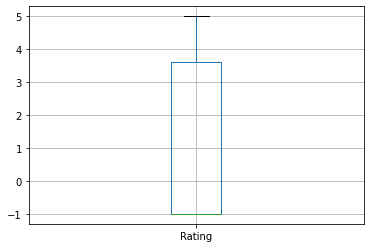

In [64]:
df.boxplot(column = 'Rating')

In [65]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.288127,0.590682,0.482218
avg_salary,0.288127,1.000000,0.510407,0.533468
Rating,0.590682,0.510407,1.000000,0.618831
desc_len,0.482218,0.533468,0.618831,1.000000


<AxesSubplot:>

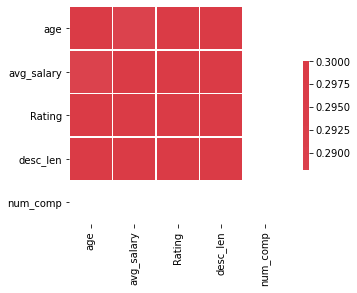

In [66]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [69]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

In [70]:
df_cat

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,job_state,same_state,python_yn,R_yn,spark,aws,excel,job_simp,seniority
0,"Washington, DC",-1,201 to 500 Employees,Contract,-1,-1,Unknown / Non-Applicable,DC,0,0,0,0,0,0,data scientist,na
1,"Chevy Chase, MD",-1,10000+ Employees,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion (USD),MD,0,0,0,0,0,0,data scientist,senior
2,"Chevy Chase, MD",-1,10000+ Employees,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion (USD),MD,0,1,0,1,0,0,data scientist,na
3,"Brooklyn, NY",-1,1001 to 5000 Employees,Company - Public,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),NY,0,0,0,0,0,0,data scientist,na
4,"Anchorage, AK",-1,51 to 200 Employees,Company - Private,-1,-1,$10 to $25 million (USD),AK,0,0,0,0,0,1,analyst,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,"Sunnyvale, CA",-1,-1,-1,-1,-1,-1,CA,0,0,0,0,0,0,data scientist,na
995,"Rockville, MD",-1,-1,-1,-1,-1,-1,MD,0,0,0,0,0,0,mle,senior
996,"Aberdeen Proving Ground, MD",-1,-1,-1,-1,-1,-1,MD,0,0,0,0,0,0,na,na
997,"Sunnyvale, CA",-1,-1,-1,-1,-1,-1,CA,0,0,0,0,0,0,analyst,na


graph for Location: total = 252


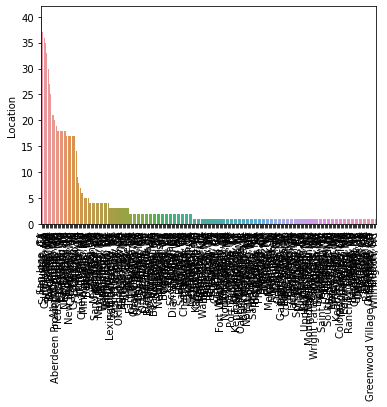

graph for Headquarters: total = 1


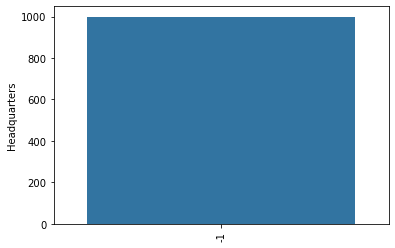

graph for Size: total = 9


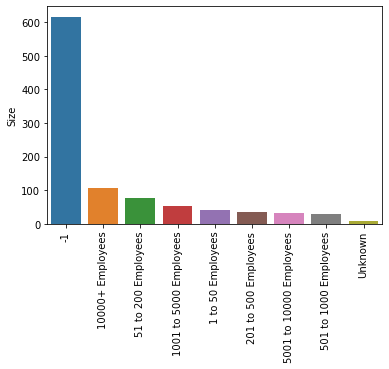

graph for Type of ownership: total = 11


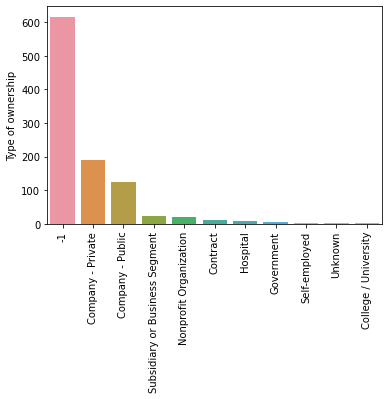

graph for Industry: total = 49


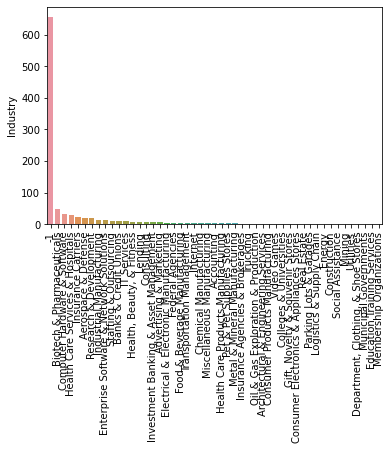

graph for Sector: total = 21


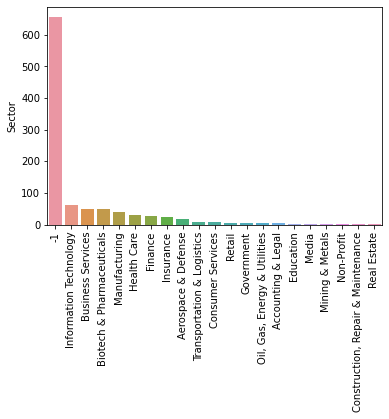

graph for Revenue: total = 14


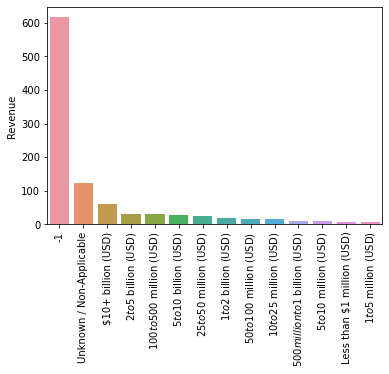

graph for job_state: total = 45


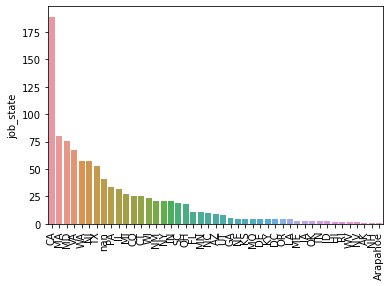

graph for same_state: total = 1


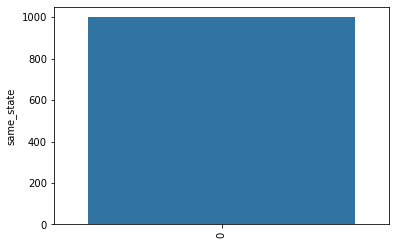

graph for python_yn: total = 2


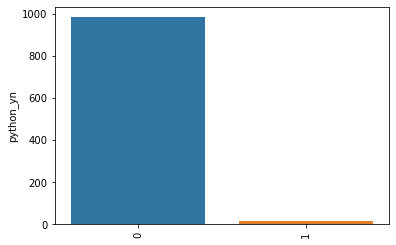

graph for R_yn: total = 1


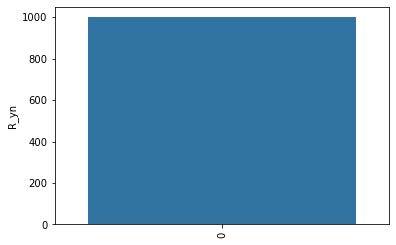

graph for spark: total = 2


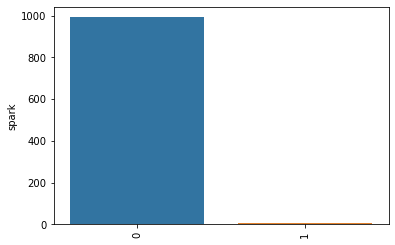

graph for aws: total = 2


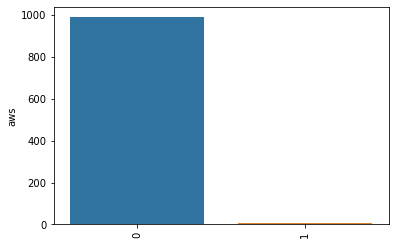

graph for excel: total = 2


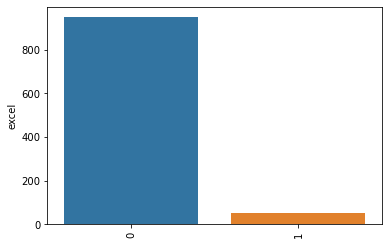

graph for job_simp: total = 7


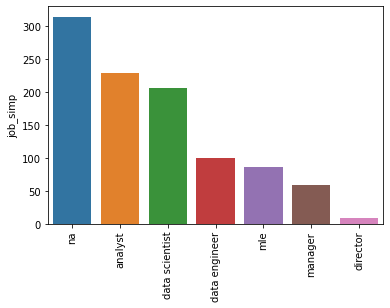

graph for seniority: total = 2


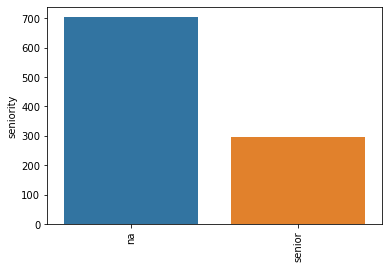

In [83]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


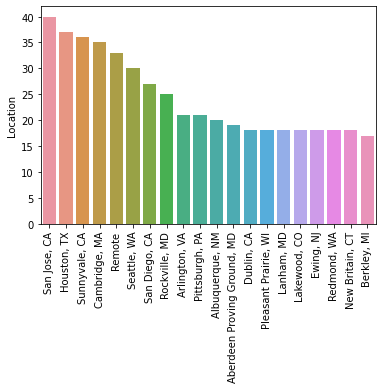

graph for Headquarters: total = 1


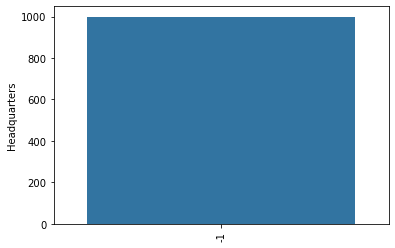

In [85]:
for i in df_cat[['Location','Headquarters']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [86]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,93.140351
data engineer,94.919192
data scientist,102.931707
director,119.333333
manager,95.094828
mle,86.627907
na,101.127389


In [87]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          92.836683
               senior      95.224138
data engineer  na          95.234848
               senior      94.287879
data scientist na          99.760417
               senior     110.418033
director       na         120.562500
               senior     109.500000
manager        na         102.552632
               senior      80.925000
mle            na          91.040816
               senior      80.783784
na             na         105.787500
               senior      92.951754

In [88]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
nan       na                  123.50
          mle                 107.00
          manager             100.00
          data scientist       98.25
          data engineer       102.90
...                              ...
AZ        data engineer       144.50
          analyst             118.00
          manager             109.50
          na                  139.25
AK        analyst              59.00

[148 rows x 1 columns]

In [90]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [96]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
nan       na                       2
          mle                      1
          manager                  2
          data scientist          30
          data engineer            5
          analyst                  1
WV        na                       1
          analyst                  1
WI        na                       1
          manager                  1
          data scientist           1
          data engineer            1
          analyst                 20
WA        data scientist           8
          analyst                  1
          data engineer            1
          mle                      1
          na                      46
VA        na                       6
          mle                      1
          data scientist          14
          data engineer           40
          analyst                  6
UT        analyst                  3
          data scientist           4
          na                       1
TX        na                       2
          mle                      1
          manager                  1
          director                 2
          data scientist          22
          data engineer            3
          analyst                 22
TN        data engineer            1
          analyst                  1
          na                       1
SC        na                      17
          analyst                  2
RI        na                       2
PA        data scientist           7
          data engineer            1
          analyst                  2
          mle                     18
          na                       6
OR        na                       2
          data scientist           2
OK        data engineer            1
          analyst                  2
OH        na                       4
          data scientist          10
          analyst                  4
NY        data engineer            1
          analyst                  5
          data scientist           4
          na                       9
          director                 2
NV        data engineer            1
          analyst                  1
NM        mle                     20
          analyst                  1
NJ        director                 4
          data scientist          20
          analyst                 18
          data engineer            2
          manager                  1
          na                      12
NH        data engineer            1
NE        na                       2
          data scientist           1
          analyst                  1
NC        na                       3
          data engineer            3
          data scientist           2
          analyst                  2
MO        na                       2
          analyst                  2
MN        na                       3
          data scientist           5
          analyst                  3
MI        na                       4
          data scientist           2
          analyst                 21
ME        analyst                  2
          data engineer            1
MD        na                      44
          mle                     20
          data scientist           9
          data engineer            1
          analyst                  2
MA        manager                  4
          analyst                  6
          data engineer           18
          data scientist           3
          na                      31
          mle                     18
LA        na                       2
          analyst                  2
KY        na                       2
          analyst                  2
KS        na                       4
IN        analyst                 20
          na                       1
IL        director                 1
          data engineer            4
          data scientist           4
          analyst                  6
          manager             

In [97]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DE,137.500000
WA,133.250000
NC,128.500000
UT,125.750000
MA,125.166667
GA,124.166667
OH,122.300000
MD,121.055556
VA,119.571429


In [98]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [103]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [104]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [105]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.4    136.500000
 2.5    124.750000
 2.8    123.700000
 5.0    122.409091
 4.0    120.928571
 4.3    119.647059
 4.7    117.000000
 3.8    116.734043
 3.0    116.166667
 4.1    116.129630
 2.9    116.125000
 3.1    115.972222
 3.5    113.650000
 3.7    113.642857
 3.4    113.546875
 4.4    113.250000
 3.9    112.103448
 2.6    111.500000
 3.6    111.360000
 4.2    109.666667
 2.7    109.500000
 3.3    107.875000
 3.2    107.350000
 4.6    105.312500
 2.2    102.000000
 4.8    100.500000
 4.9     99.500000
 4.5     92.000000
-1.0     87.814580
Industry
                                          avg_salary
Industry                                            
Construction                              161.500000
Mining                                    147.500000
Real Estate                               137.500000
Oil & Gas Exploration & Production        137.000000
Trucking                                  136.500000
Video Games             

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [106]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),19.0,1.0
$1 to $5 million (USD),6.0,NaN
$10 to $25 million (USD),15.0,NaN
$10+ billion (USD),59.0,2.0
$100 to $500 million (USD),30.0,1.0
$2 to $5 billion (USD),31.0,1.0
$25 to $50 million (USD),25.0,NaN
$5 to $10 billion (USD),26.0,1.0
$5 to $10 million (USD),7.0,2.0


In [110]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

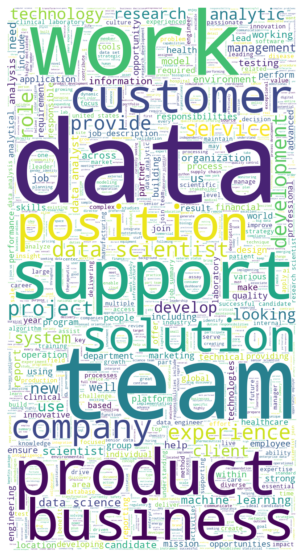

In [111]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()